# Лабораторная работа №3: Классификация kNN

6132 Макарова Мария Константиновна Датасеты:


*   https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download
*   https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?resource=download&select=spotify_songs.csv




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [37]:
data = pd.read_csv('cancer_data.csv') #считываем с помощью метода read_csv и помещяем данные в data

2. Бинарная классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
data = data.drop('Unnamed: 32',axis=1) #удаляем неполезный столбец
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
description_list = [
    "Уникальный идентификатор пациента",
    "Диагноз опухоли: M — злокачественная, B — доброкачественная",
    "Среднее значение радиуса ядра опухоли",
    "Среднее значение текстурности (изменчивость интенсивности) опухоли",
    "Среднее значение периметра ядра опухоли",
    "Среднее значение площади ядра опухоли",
    "Среднее значение гладкости (однородности) границ",
    "Среднее значение компактности (сравнение периметра и площади)",
    "Среднее значение вогнутости (глубина вогнутых частей контура)",
    "Среднее значение количества вогнутых точек на контуре",
    "Среднее значение симметрии образования",
    "Среднее значение фрактальной размерности (показатель сложности границы)",
    "Стандартное отклонение радиуса",
    "Стандартное отклонение текстурности",
    "Стандартное отклонение периметра",
    "Стандартное отклонение площади",
    "Стандартное отклонение гладкости",
    "Стандартное отклонение компактности",
    "Стандартное отклонение вогнутости",
    "Стандартное отклонение количества вогнутых точек",
    "Стандартное отклонение симметрии",
    "Стандартное отклонение фрактальной размерности",
    "Наибольшее значение радиуса",
    "Наибольшее значение текстурности",
    "Наибольшее значение периметра",
    "Наибольшее значение площади",
    "Наибольшее значение гладкости",
    "Наибольшее значение компактности",
    "Наибольшее значение вогнутости",
    "Наибольшее значение количества вогнутых точек",
    "Наибольшее значение симметрии",
    "Наибольшее значение фрактальной размерности"
]
dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
id,int64,Уникальный идентификатор пациента
diagnosis,object,"Диагноз опухоли: M — злокачественная, B — доброкачественная"
radius_mean,float64,Среднее значение радиуса ядра опухоли
texture_mean,float64,Среднее значение текстурности (изменчивость интенсивности) опухоли
perimeter_mean,float64,Среднее значение периметра ядра опухоли
area_mean,float64,Среднее значение площади ядра опухоли
smoothness_mean,float64,Среднее значение гладкости (однородности) границ
compactness_mean,float64,Среднее значение компактности (сравнение периметра и площади)
concavity_mean,float64,Среднее значение вогнутости (глубина вогнутых частей контура)
concave points_mean,float64,Среднее значение количества вогнутых точек на контуре


In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [41]:
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1}) #заменяем категориальные признаки

2. Бинарная классификация:
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для всех последующих манипуляций.

In [42]:
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов {np.bincount(y_train)}")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 31 признаков
Число разных классов [169 286]
Тестовая выборка имеет 114 экземпляров и 31 признаков
Число разных классов [43 71]


2. Бинарная классификация:
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Метрики на ненормированных данных:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion, display_labels=[0, 1])

Метрики на ненормированных данных:
Accuracy: 0.7543859649122807
Precision: 0.7590361445783133
Recall: 0.8873239436619719
F1 Score: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        43
           1       0.76      0.89      0.82        71

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



2. Бинарная классификация:
   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.
     > Далее используем нормализованные данные.

In [44]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [45]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
y_pred_s = knn_scaled.predict(X_test_s)

print("Метрики на нормированных данных:")
print("Accuracy:", accuracy_score(y_test, y_pred_s))
print("Precision:", precision_score(y_test, y_pred_s))
print("Recall:", recall_score(y_test, y_pred_s))
print("F1 Score:", f1_score(y_test, y_pred_s))
print(classification_report(y_test, y_pred_s))

confusion_s = confusion_matrix(y_test, y_pred_s)
disp_s = ConfusionMatrixDisplay(confusion_s, display_labels=[0, 1])

Метрики на нормированных данных:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'Матрица ошибок с нормализацией')

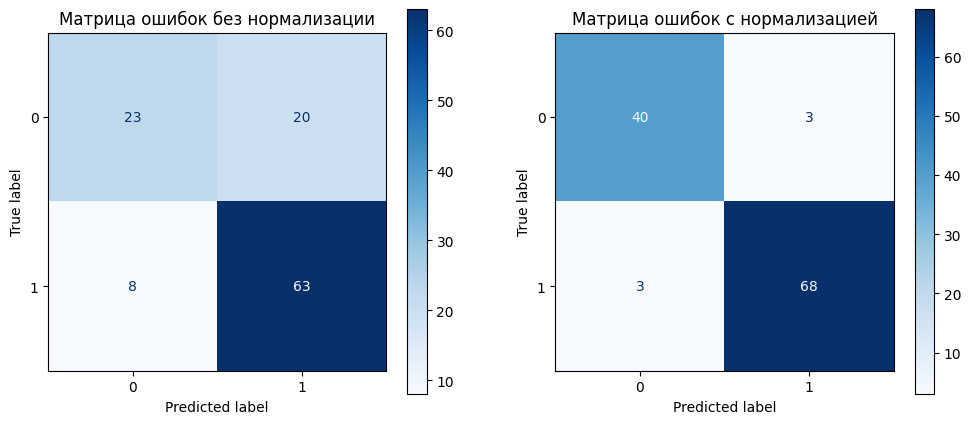

In [46]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок без нормализации')

disp_s.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с нормализацией')

2. Бинарная классификация:
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений

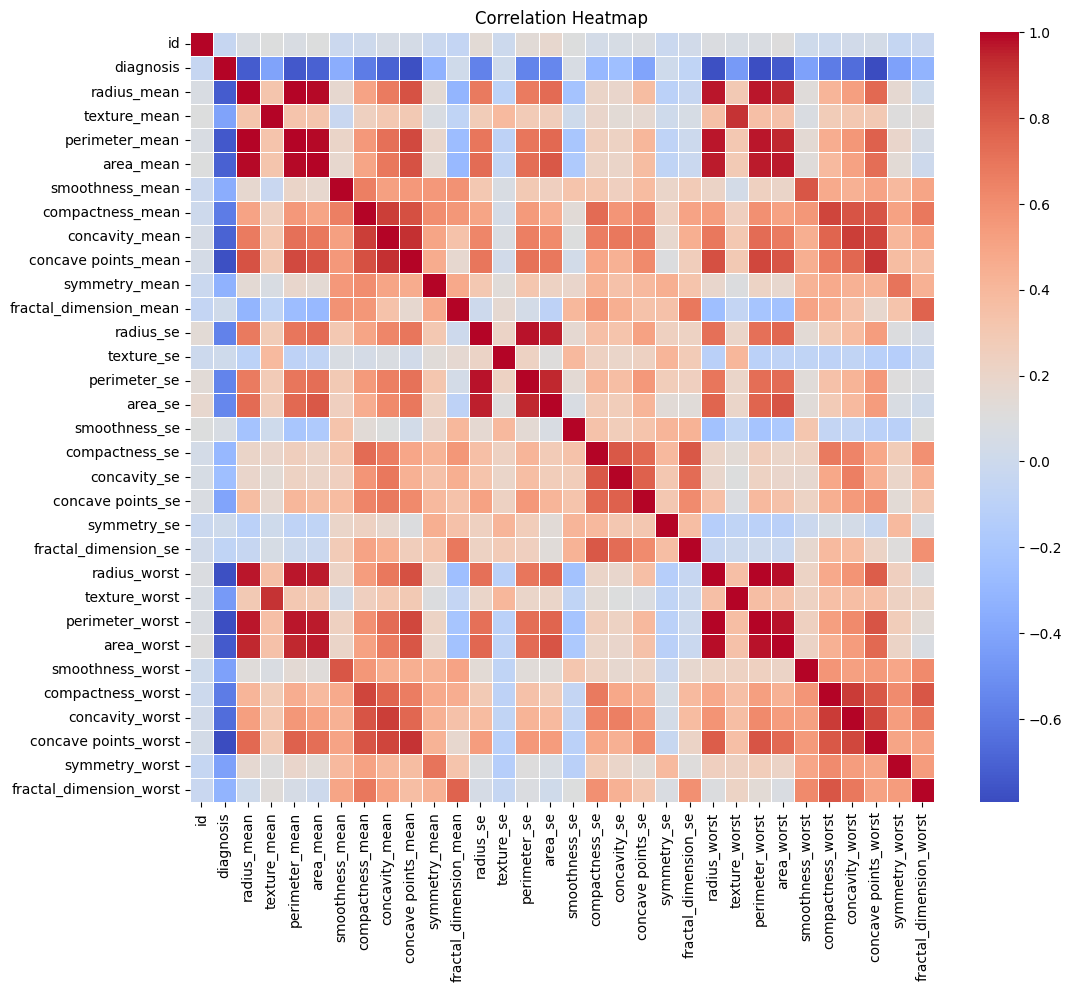

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

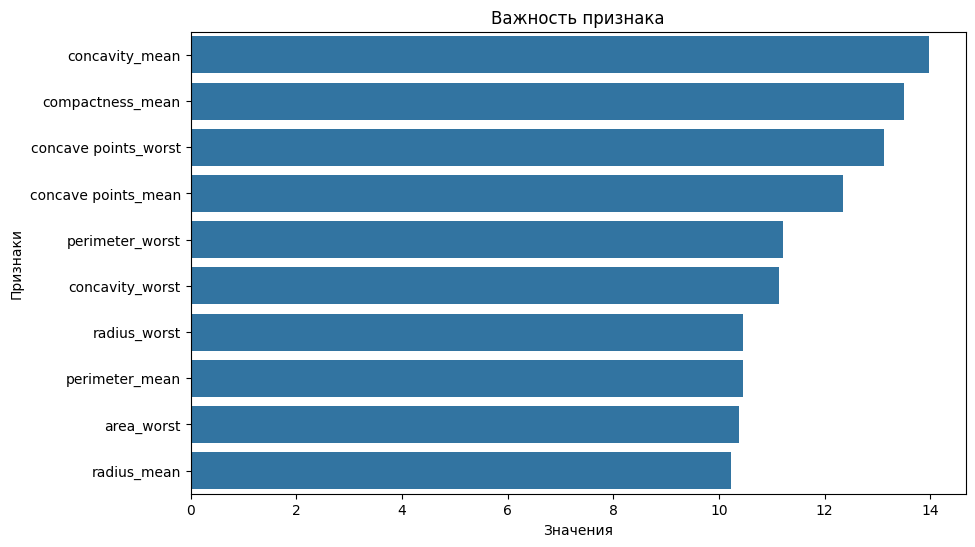

Наиболее важные признаки:
['concavity_mean', 'compactness_mean', 'concave points_worst', 'concave points_mean', 'perimeter_worst', 'concavity_worst', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean']


In [17]:
correlation_matrix = data.drop(columns = ['diagnosis', 'id']).corr()

data_array = correlation_matrix.values

np.fill_diagonal(data_array, 0)
threshold = 0.5

filtered_corr = correlation_matrix[abs(correlation_matrix) > threshold]

feature_importance = filtered_corr.sum()

feature_importance = feature_importance.sort_values(ascending=False)

plot_threshold = 10

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[feature_importance > plot_threshold].values, y=feature_importance[feature_importance > plot_threshold].index)
plt.title('Важность признака')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()

selected_features = feature_importance[feature_importance.abs() > plot_threshold].index.tolist()
print("Наиболее важные признаки:")
print(selected_features)

2. Бинарная классификация:
   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
     > Естественно, искомые результаты - улучшение метрик.

In [18]:
X_train_f = scaler.fit_transform(X_train[selected_features])
X_test_f = scaler.fit_transform(X_test[selected_features])

knn_f = KNeighborsClassifier(n_neighbors=5)
knn_f.fit(X_train_f, y_train)
y_pred_f = knn_f.predict(X_test_f)

print("Метрики на отфильтрованных данных:")
print("Accuracy:", accuracy_score(y_test, y_pred_f))
print("Precision:", precision_score(y_test, y_pred_f))
print("Recall:", recall_score(y_test, y_pred_f))
print("F1 Score:", f1_score(y_test, y_pred_f))
print(classification_report(y_test, y_pred_f))

confusion_f = confusion_matrix(y_test, y_pred_f)
disp_f = ConfusionMatrixDisplay(confusion_f, display_labels=[0, 1])

Метрики на отфильтрованных данных:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

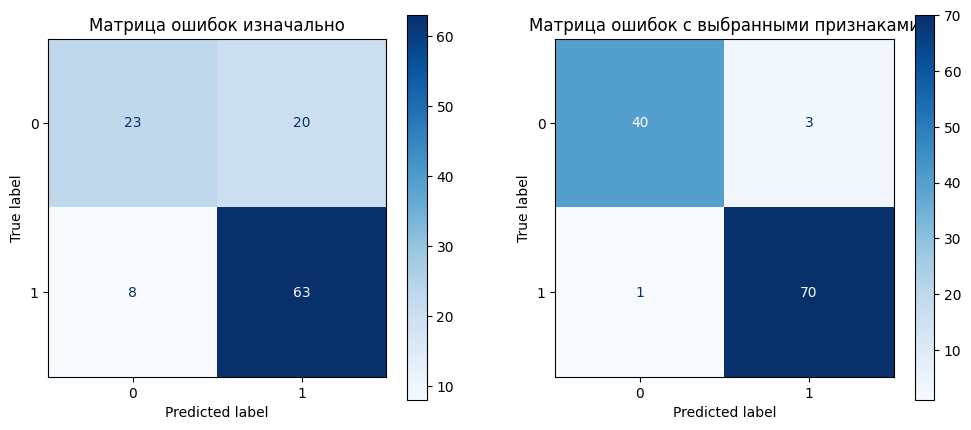

In [19]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

disp_f.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

2. Бинарная классификация:
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации
     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

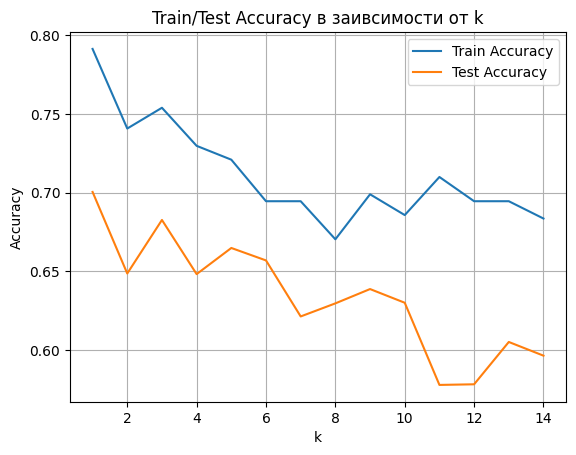

In [20]:
train_scores = []
test_scores = []
ks = range(1, 15)

for k in ks:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    train_score = cross_val_score(knn_cv, X_train, y_train, cv=5).mean()
    test_score = cross_val_score(knn_cv, X_test, y_test, cv=5).mean()
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(ks, train_scores, label="Train Accuracy")
plt.plot(ks, test_scores, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy в заивсимости от k")
plt.legend()
plt.grid(True)
plt.show()

3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.

In [47]:
data = pd.read_csv('spotify_songs.csv') #считываем с помощью метода read_csv и помещяем данные в data

In [22]:
description_list = [
    "Уникальный идентификатор песни",
    "Название песни",
    "Исполнитель песни",
    "Популярность песни (0-100), где выше — лучше",
    "Уникальный идентификатор альбома",
    "Название альбома песни",
    "Дата выпуска альбома",
    "Название плейлиста",
    "Идентификатор плейлиста",
    "Жанр плейлиста",
    "Поджанр плейлиста",
    "Танцевальность описывает, насколько трек подходит для танцев, на основе сочетания музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 наименее танцевально, а 1,0 наиболее танцевально",
    "Энергия — это мера от 0,0 до 1,0, которая представляет собой перцептивную меру интенсивности и активности. Перцептивные характеристики, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.",
    "Оценочная общая тональность трека. Целые числа сопоставляются с тонами с использованием стандартной нотации класса высоты тона",
    "Общая громкость трека в децибелах (дБ)",
    "Режим указывает модальность (мажорную или минорную) трека, тип шкалы, из которой выводится его мелодическое содержание. Major представлен 1, а minor — 0",
    "Speechiness определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1,0 значение атрибута. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения между 0,33 и 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо в разделах, либо наслоенными, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки",
    "Мера достоверности от 0,0 до 1,0 того, является ли трек акустическим. 1,0 представляет высокую достоверность того, что трек акустический",
    "Предсказывает, содержит ли трек вокальные данные. Звуки «ух» и «аах» в этом контексте рассматриваются как инструментальные. Треки рэпа или произнесенных слов явно «вокальные». Чем ближе значение инструментальности к 1,0, тем больше вероятность, что трек не содержит вокального контента. Значения выше 0,5 предназначены для представления инструментальных треков, но уверенность тем выше, чем ближе значение к 1,0",
    "Определяет присутствие аудитории в записи. Более высокие значения liveness представляют повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек является живым",
    "Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком",
    "Общий предполагаемый темп трека в ударах в минуту (BPM)",
    "Длительность песни в миллисекундах"
]

dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
track_id,object,Уникальный идентификатор песни
track_name,object,Название песни
track_artist,object,Исполнитель песни
track_popularity,int64,"Популярность песни (0-100), где выше — лучше"
track_album_id,object,Уникальный идентификатор альбома
track_album_name,object,Название альбома песни
track_album_release_date,object,Дата выпуска альбома
playlist_name,object,Название плейлиста
playlist_id,object,Идентификатор плейлиста
playlist_genre,object,Жанр плейлиста


In [48]:
data['playlist_genre'].value_counts()

,count
playlist_genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


In [50]:
data['playlist_genre'] = data['playlist_genre'].replace({'edm': 0, 'rap': 1, 'pop': 2, 'r&b': 3, 'latin': 4, 'rock': 5})

In [51]:
data_numeric = data.select_dtypes(include='number').dropna() #убираем категориальные признаки

In [52]:
data_numeric.head()

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


3. Многоклассовая классификация:
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [53]:
X = data_numeric.drop(columns = ['playlist_genre'])
y = data_numeric['playlist_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов {np.bincount(y_train)}")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов {np.bincount(y_test)}")

Тренировочная выборка имеет 26266 экземпляров и 13 признаков
Число разных классов [4825 4578 4426 4400 4122 3915]
Тестовая выборка имеет 6567 экземпляров и 13 признаков
Число разных классов [1218 1168 1081 1031 1033 1036]


In [54]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
y_pred_s = knn_scaled.predict(X_test_s)

print("Метрики на нормированных данных:")
print("Accuracy:", accuracy_score(y_test, y_pred_s))
print("Precision:", precision_score(y_test, y_pred_s, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_s, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_s, average='weighted'))
print(classification_report(y_test, y_pred_s))

confusion_s = confusion_matrix(y_test, y_pred_s)
disp_s = ConfusionMatrixDisplay(confusion_s, display_labels=[0, 1, 2, 3, 4, 5])

Метрики на нормированных данных:
Accuracy: 0.4667275772803411
Precision: 0.46850199155315114
Recall: 0.4667275772803411
F1 Score: 0.46395427315794535
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1218
           1       0.53      0.55      0.54      1168
           2       0.29      0.32      0.30      1081
           3       0.39      0.36      0.37      1031
           4       0.43      0.32      0.37      1033
           5       0.64      0.54      0.59      1036

    accuracy                           0.47      6567
   macro avg       0.47      0.46      0.46      6567
weighted avg       0.47      0.47      0.46      6567



3. Многоклассовая классификация:
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.

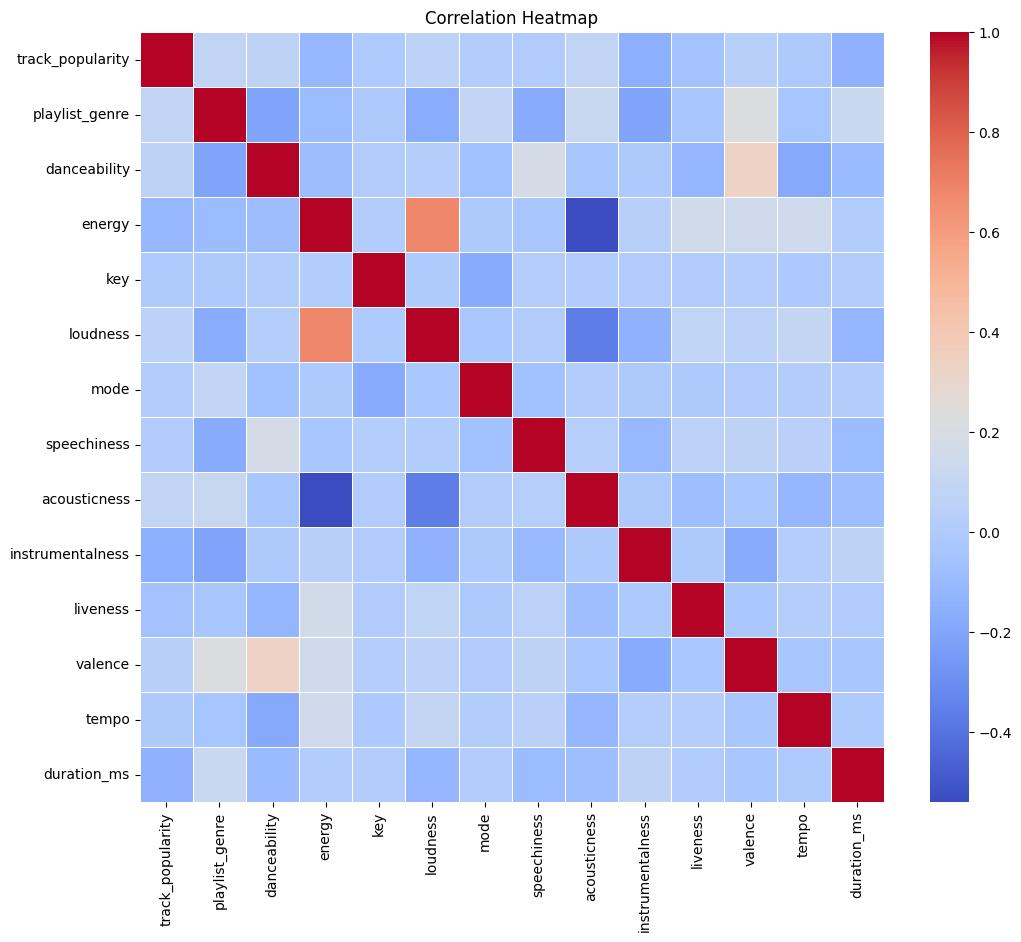

In [29]:
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

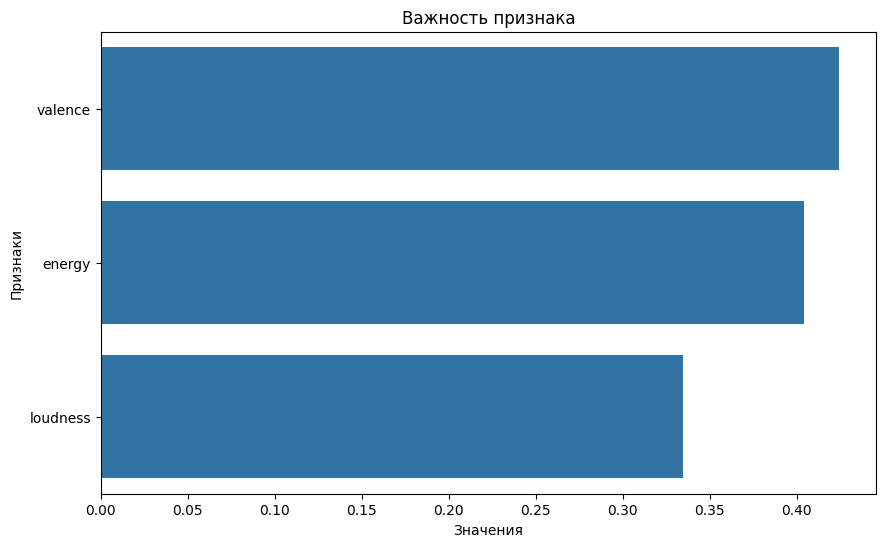

Наиболее важные признаки:
['valence', 'energy', 'loudness']


In [55]:
correlation_matrix = data_numeric.drop(columns = ['playlist_genre']).corr()
data_array = correlation_matrix.values

np.fill_diagonal(data_array, 0)
threshold = 0.05

filtered_corr = correlation_matrix[abs(correlation_matrix) > threshold]

feature_importance = filtered_corr.sum()

feature_importance = feature_importance.sort_values(ascending=False)

plot_threshold = 0.05

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[feature_importance > plot_threshold].values, y=feature_importance[feature_importance > plot_threshold].index)
plt.title('Важность признака')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()

selected_features = feature_importance[feature_importance > plot_threshold].index.tolist()
print("Наиболее важные признаки:")
print(selected_features)

In [56]:
X_train_f = scaler.fit_transform(X_train[selected_features])
X_test_f = scaler.fit_transform(X_test[selected_features])

knn_f = KNeighborsClassifier(n_neighbors=5)
knn_f.fit(X_train_f, y_train)
y_pred_f = knn_f.predict(X_test_f)

print("Метрики на отфильтрованных данных:")
print("Accuracy:", accuracy_score(y_test, y_pred_f))
print("Precision:", precision_score(y_test, y_pred_f, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_f, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_f, average='weighted'))
print(classification_report(y_test, y_pred_f))

confusion_f = confusion_matrix(y_test, y_pred_f)
disp_f = ConfusionMatrixDisplay(confusion_f, display_labels=[0, 1, 2, 3, 4, 5])

Метрики на отфильтрованных данных:
Accuracy: 0.2980051774021623
Precision: 0.29456026216908804
Recall: 0.2980051774021623
F1 Score: 0.2915348313668824
              precision    recall  f1-score   support

           0       0.38      0.53      0.44      1218
           1       0.24      0.26      0.25      1168
           2       0.21      0.20      0.20      1081
           3       0.29      0.31      0.30      1031
           4       0.28      0.19      0.23      1033
           5       0.38      0.28      0.32      1036

    accuracy                           0.30      6567
   macro avg       0.29      0.29      0.29      6567
weighted avg       0.29      0.30      0.29      6567



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

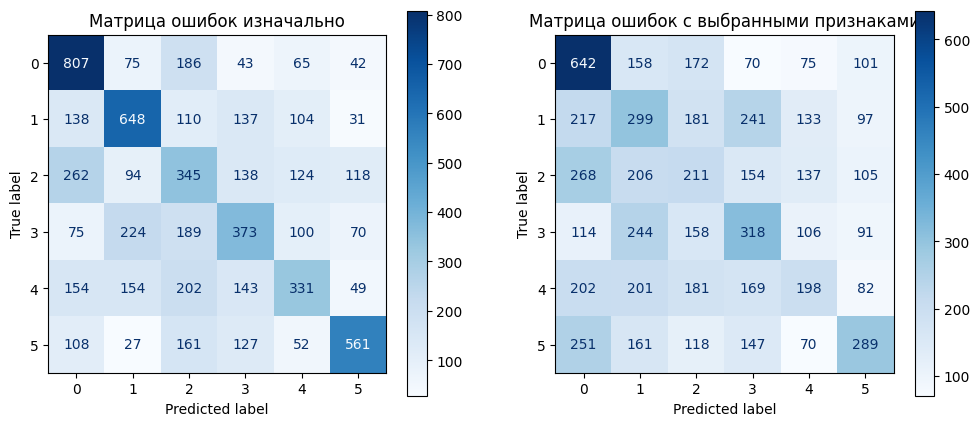

In [57]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp_s.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

disp_f.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

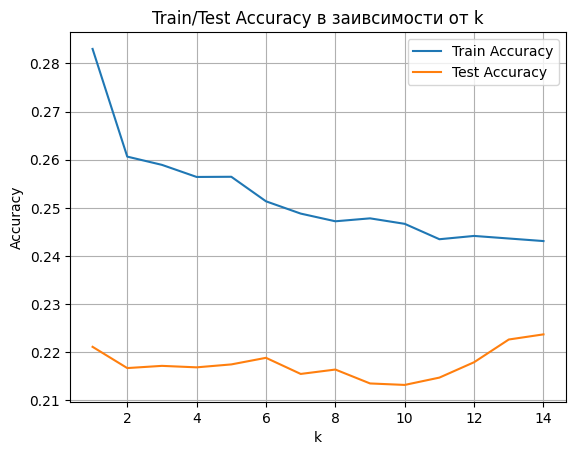

In [35]:
train_scores = []
test_scores = []
ks = range(1, 15)

for k in ks:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    train_score = cross_val_score(knn_cv, X_train, y_train, cv=5).mean()
    test_score = cross_val_score(knn_cv, X_test, y_test, cv=5).mean()
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(ks, train_scores, label="Train Accuracy")
plt.plot(ks, test_scores, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy в заивсимости от k")
plt.legend()
plt.grid(True)
plt.show()